In [ ]:
# The code begins by importing necessary libraries and loading a CSV file (UScomments.csv) containing YouTube comments data 
# into a Pandas DataFrame named comments.
# Initial data exploration is done by checking for and dropping any null values in the DataFrame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
comments=pd.read_csv(r'G:\DV Analytics\Projects\Udemy\Youtube_project_shan_singh_Udemy/UScomments.csv',error_bad_lines=False)

In [ ]:
comments.head()

In [ ]:
comments.isnull().sum()

In [ ]:
comments.dropna(inplace=True)

In [ ]:
comments.isnull().sum()

# Sentiment Analysis

In [ ]:
# Polarity value for sentiment expression lies between(-1,1) we are going to insert polarity value for comments.
# Package we are use here its Textblob. 
# TextBlob, a Python library for processing textual data, is used for sentiment analysis. 
# The sentiment polarity of each comment in the dataset is calculated and 
# stored in a new column named 'polarity' in the DataFrame.

!pip install textblob
from textblob import TextBlob

In [ ]:
comments.head()

In [ ]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment

In [ ]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

In [ ]:
polarity=[]

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)
    

In [ ]:
len(polarity)

In [ ]:
comments['polarity']=polarity

In [ ]:
comments.head()

# WordCloud Analysis 

In [ ]:
# here we filter out data with positive polarity
# Positive and negative comments are filtered based on their polarity values.
# WordClouds are generated for both positive and negative comments, 
# showcasing the most frequent words used in each sentiment category.
filter1=comments['polarity']==1
comments_positive=comments[filter1]
comments_positive

In [ ]:
# here we filter out data with negative polarity
filter2=comments['polarity']==-1
comments_negative=comments[filter2]
comments_negative

In [ ]:
# Here we import some packges wordcloud, stopwords
# STOPWORDS are thos words which haveno use in our analysis they are meaningless like (is,the,it,to,up...) 
# we need to exclude them
!pip install wordcloud
from wordcloud import WordCloud , STOPWORDS

In [ ]:
# This are the words under stopwords
set(STOPWORDS)

In [ ]:
type(comments['comment_text'])

In [ ]:
total_comment_positive=' '.join(comments_positive['comment_text'])

In [ ]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comment_positive)

In [ ]:
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
### Conclusion-->> positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc..

In [ ]:
total_comment_negative=' '.join(comments_negative['comment_text'])

In [ ]:
wordcloud2=WordCloud(stopwords=set(STOPWORDS)).generate(total_comment_negative)

(-0.5, 399.5, 199.5, -0.5)

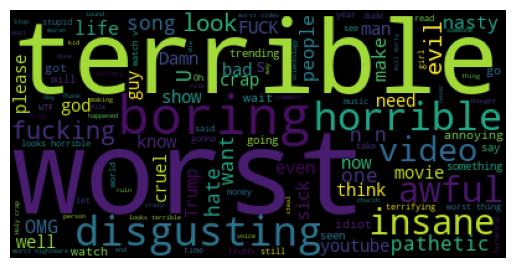

In [138]:
plt.imshow(wordcloud2)
plt.axis('off')

In [ ]:
### Conclusion-->> Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

# Emoji Analysis

In [ ]:
# The code utilizes the emoji library to extract and analyze emojis from comments.

!pip install emoji==2.2.0

In [ ]:
import emoji

In [ ]:
emoji.__version__

In [ ]:
comments['comment_text'].head(6)

In [ ]:
comment='trending 😉'

In [ ]:
[char for char in comment if char in emoji.EMOJI_DATA]

In [ ]:
all_emojis_list=[]

for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [ ]:
all_emojis_list[0:10]

In [ ]:
from collections import Counter

In [ ]:
Counter(all_emojis_list).most_common(10)

In [ ]:
# It counts the occurrences of each emoji and visualizes the top 10 most common emojis using Plotly.
emojis=[Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]
emojis

In [ ]:
freqs=[Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]
freqs

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
trace=go.Bar(x=emojis , y=freqs)

In [ ]:
iplot([trace])

In [ ]:
## Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..

# Collect Entire Data of You tube

In [ ]:
# The code collects additional data from multiple CSV files located in a directory and 
# concatenates them into a single DataFrame named full_df.

import os

In [ ]:
files=os.listdir(r'G:\DV Analytics\Projects\Udemy\Youtube_project_shan_singh_Udemy\additional_data')

In [ ]:
files

In [ ]:
files_csv=[file for file in files if '.csv' in file]

In [ ]:
files_csv

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
full_df=pd.DataFrame()
path=r'G:\DV Analytics\Projects\Udemy\Youtube_project_shan_singh_Udemy\additional_data'

for file in files_csv:
    current_df=pd.read_csv(path+'/'+file , encoding='iso-8859-1' , error_bad_lines=False)
    
    full_df=pd.concat([full_df , current_df] , ignore_index=True)

In [ ]:
full_df.shape

In [ ]:
full_df[full_df.duplicated()].shape

In [ ]:
# Duplicates are removed from the combined DataFrame.
full_df=full_df.drop_duplicates()
full_df.shape

In [ ]:
# The processed data is exported to CSV and JSON files, and also to a SQLite database for further analysis or sharing.
full_df.to_csv(r'G:\DV Analytics\Projects\Udemy\Youtube_project_shan_singh_Udemy\Export Data/you_tube_data.csv',index=False)

In [ ]:
full_df[0:1000].to_csv(r'G:\DV Analytics\Projects\Udemy\Youtube_project_shan_singh_Udemy\Export Data/you_tube_data_sample.csv',index=False)

In [ ]:
full_df.to_json(r'G:\DV Analytics\Projects\Udemy\Youtube_project_shan_singh_Udemy\Export Data/you_tube_data.json')

In [ ]:
full_df[0:1000].to_json(r'G:\DV Analytics\Projects\Udemy\Youtube_project_shan_singh_Udemy\Export Data/you_tube_data_sample.json')

In [ ]:
from sqlalchemy import create_engine
engine = create_engine(r'sqlite:///G:\DV Analytics\Projects\Udemy\Youtube_project_shan_singh_Udemy\Export Data/you_tube_sampe.sqlite')


In [ ]:
full_df[0:1000].to_sql('Users', con=engine , if_exists='append')

In [ ]:
full_df['category_id'].unique()

# Which category has maximum Number of Likes

In [ ]:
json_df=pd.read_json(r'G:\DV Analytics\Projects\Udemy\Youtube_project_shan_singh_Udemy\additional_data/US_category_id.json')

In [ ]:
json_df.head(10)

In [ ]:
json_df['items'][0]

In [ ]:
# The code maps category IDs in the DataFrame to their respective names using data from a JSON file.
cat_dict={}

for item in json_df['items'].values:
    cat_dict[int(item['id'])]=item['snippet']['title']
    

In [ ]:
cat_dict

In [ ]:
full_df['category_name']=full_df['category_id'].map(cat_dict)

In [ ]:
full_df.head(4)

In [ ]:
# It then visualizes the distribution of likes across different video categories using a box plot.
# Here you can see some of category has maximum likes eg. music,entertainmnet etc
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

# Find Whether audience is engaged or not

In [ ]:
# Metrics like like rate, dislike rate, and comment count rate are calculated and added to the DataFrame.
# Box plots and regression plots are used to explore the relationship between views, likes, and dislikes.

full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [ ]:
full_df.columns

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name' , y='like_rate' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# here we can say that as far as my views increases likes also increases
# there is corelation between views and likes.
sns.regplot(x='views' , y='likes' , data=full_df)

In [ ]:
full_df.columns

In [ ]:
full_df[['views', 'likes', 'dislikes']].corr()

In [ ]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr() , annot=True)

# Which Channels have largest number of trending videos 

In [ ]:
full_df.head(6)

In [ ]:
full_df['channel_title'].value_counts()

In [ ]:
# same thing achieve using groupby
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
cdf

In [ ]:
cdf = cdf.rename(columns={0:'total_videos'})
cdf

In [ ]:
import plotly.express as px

In [ ]:
# The code counts the number of videos from each channel and visualizes the top 20 channels with the most videos using Plotly.
px.bar(data_frame=cdf[0:20] , x='channel_title' , y='total_videos' )

# Does Punctuations in title and tags have any relation with views, likes, dislikes or comments

In [ ]:
full_df['title'][0]

In [ ]:
import string

In [ ]:
string.punctuation

In [ ]:
# The code counts the number of punctuations in video titles and explores 
# whether there's any relationship between punctuation count and views, likes, or dislikes using box plots.
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [ ]:
sample = full_df[0:10000]

In [ ]:
sample['count_punc']=sample['title'].apply(punc_count)

In [ ]:
sample['count_punc']

In [ ]:
# There are 2 , 3 punctuaation count where views are high. 
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='views' , data=sample)
plt.show()

In [ ]:
# For 2,3 and 6 Punctuation count where likes are too high.
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='likes' , data=sample)
plt.show()